# linear regression

- y=a+bx+b1.x1+b2.x2
- y=>dependent/target(only one) [1d]
- x=>independent/features(can be n numbers)   [2d]


In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error   #r2 should be big ,errors should be lesser

In [24]:
time=np.array([5,7,12,16,20]).reshape(-1,1)   #independent

In [25]:
mass=np.array([40,120,180,210,240])       #dependent

In [26]:
mymodel=LinearRegression()
mymodel.fit(time,mass)

LinearRegression()

In [27]:
x=int(input("Enter the time in minutes: "))
result=mymodel.predict([[x]])  
print("If the time is",x,"minutes the mass is",result[0],"grams.")

Enter the time in minutes:  25


If the time is 25 minutes the mass is 316.7012987012987 grams.


In [28]:
mass_model=mymodel.predict(time)
print(mass_model)

[ 72.54545455  96.96103896 158.         206.83116883 255.66233766]


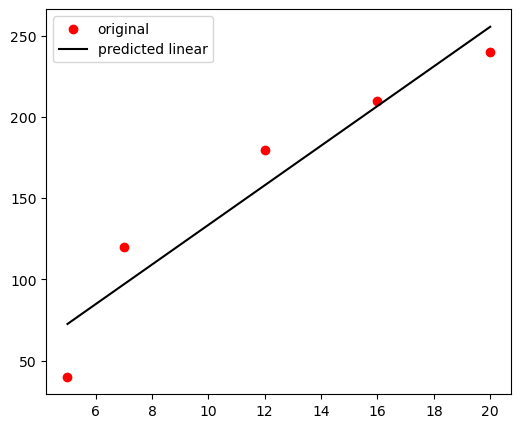

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(time,mass,label="original",color='Red')
plt.plot(time,mass_model,label="predicted linear",color='k')
plt.legend()
plt.show()

In [31]:
r2score=r2_score(time,mass_model)
print(r2score)

-816.6925282509699


In [32]:
mse=mean_squared_error(time,mass_model)
print(mse)

25184.929870129872


In [33]:
mae=mean_absolute_error(time,mass_model)
print(mae)

146.0


1. inport library
2. load data
3. split data
4. create snd train model
5. evaluation

case: predicting the salary from age ,expiriance, gender amd educn

In [91]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [92]:
df1=pd.read_csv(r"C:\my pythonfiles\Salary_EDA.csv")
df1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


In [93]:
df1.isnull().sum()

Age                    2
Gender                 4
Education Level        3
Job Title              5
Years of Experience    2
Salary                 3
dtype: int64

In [94]:
df1.dropna(inplace=True)   
df1

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


data preprocessing

In [95]:
g_e=LabelEncoder()
df1['gender_encode']=g_e.fit_transform(df1['Gender'])
edu_e=LabelEncoder()
df1['Edu_level_encode']=edu_e.fit_transform(df1['Education Level'])
df1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,gender_encode,Edu_level_encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0


In [106]:
X=df1[['Age','gender_encode','Edu_level_encode','Years of Experience']]
Y=df1[['Salary']]

In [107]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [108]:
salary_model=LinearRegression()
salary_model.fit(X_train,Y_train)

LinearRegression()

In [109]:
ag=float(input("Enter your age: "))
gend_u=input("Enter your Gender: ")
edu_u=input("Enter your education level: ")
y=float(input("Enter your expirience in years: "))

Enter your age:  30
Enter your Gender:  Male
Enter your education level:  PhD
Enter your expirience in years:  6


In [110]:
gend_enc=g_e.transform([gend_u])[0]
edu_enc=edu_e.transform([edu_u])[0]
print(gend_enc,edu_enc)

1 2


In [111]:
result=salary_model.predict([[ag,gend_enc,edu_enc,y]]) 
print(result)

[[90411.99525409]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


evaluation
1. predict test values
2. visualize
3. metrics

In [113]:
model_predictions=salary_model.predict(X_test)

In [115]:
len(Y_test)

74

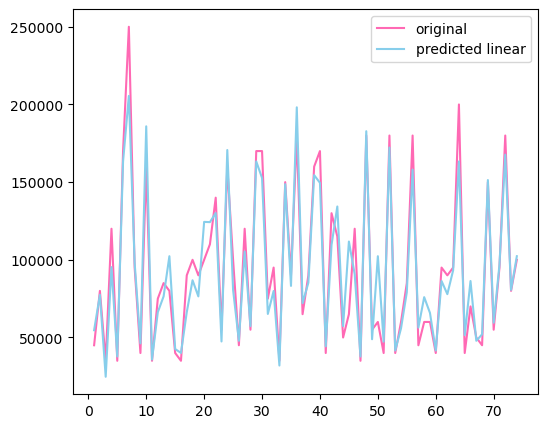

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.plot(np.arange(1,75),Y_test,label="original",color='Hotpink')
plt.plot(np.arange(1,75),model_predictions,label="predicted linear",color='Skyblue')
plt.legend()
plt.show()

In [123]:
r2score=r2_score(Y_test,model_predictions)
print(r2score)
if(r2score>0.5):
    print("Model is good fit")
else:
    print("Model is not good fit")

0.908465830252362
Model is good fit
